In [1]:
import numpy
from numpy import array, zeros, arange, exp, sin, pi
from numpy.random import randn, uniform
from scipy.io.wavfile import write

from IPython.display import Audio

In [2]:
from numpy.fft import fft
import matplotlib.pyplot as plt

In [3]:
RATE = 44100

In [4]:
# data = uniform(-1, 1, RATE)  # 44100 random samples between -1 and 1
# data = randn(RATE)
# t = arange(3 * RATE) / RATE
# data = sin(2 * pi * 440 * t) + .5 * sin(2 * pi * 880 * t) + .25 * sin(2 * pi * 1320 * t) + .12 * sin(2 * pi * 1760 * t)

In [5]:
# concordant_pairs = [(5, 3), (5, 4), (7, 5), (17, 10), (23, 16), (21, 19), (26, 21), (29, 21), (31, 20), (30, 23), (37, 22)]
# concordant_pairs = sorted(concordant_pairs, key=lambda x: x[0] / x[1])
concordant_ratios = [1.00000, 1.04200, 1.06200, 1.07500, 1.08200, 1.10000, 1.11000, 1.12500, 1.14300, 1.16600, 1.18200, 1.20000, 1.22200, 1.25000, 1.27200, 1.28600, 1.30000, 1.33300, 1.37400, 1.40000, 1.42900, 1.44400, 1.50000, 1.53500, 1.55400, 1.57100, 1.60000, 1.62500, 1.66700, 1.69700, 1.71400, 1.75000, 1.77700, 1.80000, 1.83300, 1.85600, 1.87500, 1.88900]

In [17]:
T = 2
N = T * RATE
t = arange(N) / RATE

# f0 = 400
# n, d = concordant_pairs[10]
# f1 = n / d * f0
# r = concordant_ratios[21]
# r = 3 / 2
# f1 = r * f0
# data = sin(2 * pi * t * f0)
# data += sin(2 * pi * t * f1)

# f0 = 400
# f1 = 1.5 * f0
# f2 = 1.2603 * f0
# data = sin(2 * pi * t * f0)
# data += sin(2 * pi * t * f1)
# data += sin(2 * pi * t * f2)

# f0 = 400
# ratios = [1.33, 1.5, 2, 2.5, 3]
# amplitudes = [1, 1, .7, .5, .15, .05]
# data = sin(2 * pi * t * f0)
# for i, r in enumerate(ratios):
#     data += amplitudes[i] * sin(2 * pi * t * f0 * r)

f0 = 300
alphas = array([1, .5, 0, .4, .2, .1, .05])

# data = (alphas[:, None] * sin(2 * pi * t[None, :] * f0)).sum(axis=0)
data = alphas[0] * sin(2 * pi * t * f0)
for i in range(1, len(alphas)):
#     if i == 3:
#         data += alphas[i] * sin(2 * pi * t * f0 * (i + 1))
    data += alphas[i] * sin(2 * pi * t * f0 * (i + 1))

# M = 30
# alpha = [1, 0, 0, 0, .5, 0, .5]
# alpha = [1, 0, .25, 0, .125, 0, .0675, 0, .001]
# alpha = [1, .7, .7, .5, .5, .3, .3]
# M = len(alpha)
# alpha = 1.5**(-arange(M))
# for i in range(1, M):
#     data += alpha[i] * sin(2 * pi * t * (i + 1) * f0)
#     data += alpha[i] * sin(2 * pi * t * (i + 1) * f1)

# M = N // len(concordant_ratios)
# data = zeros(t.shape)
# for i, r in enumerate(concordant_ratios):
#     i0, i1 = i * M, (i + 1) * M
#     if i > 0:
        
#     f1 = r * f0
#     data[i0:i1] = sin(2 * pi * t[i0:i1] * f0) + sin(2 * pi * t[i0:i1] * f1)

In [18]:
Audio(data=data, rate=44100, autoplay=True)

In [236]:
# N = 1 * RATE
# t = arange(N) / RATE
# f0 = 140
# f1 = 8 * f0
# data = sin(2 * pi * t * f1)

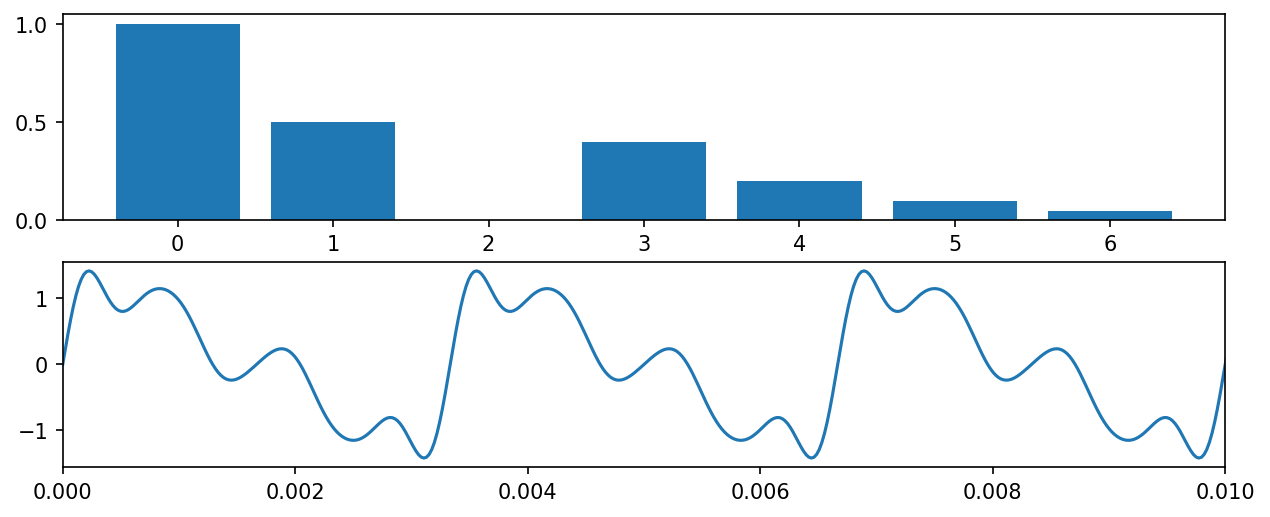

In [20]:
fig = plt.figure(figsize=(10, 4), dpi=150)
ax_coeffs = fig.add_subplot(211)
ax_wave = fig.add_subplot(212)
ax_coeffs.bar(range(len(alphas)), alphas)
ax_wave.plot(t, data)
ax_wave.set_xlim(0, .01)
plt.show()

$$
f_0 = ? \\
f_1 = \frac{3}{2} f_0 \\
H(f_0) = \{ f_0, 2 f_0, 3 f_0, \dots \} \\
H(f_1) = \{ \frac{3}{2} f_0, 3 f_0, \frac{9}{2} f_0 \}
$$

In [22]:
N = 20 * RATE  # length of clip in samples
t = arange(N) / RATE
M = 40
f0 = 440 + arange(N) / N * -10
alpha = 1.9**(-arange(M))
# alpha = array([1, .5, .7, .1, .4, .2, .2, .3, .1, .1, .05, .05, .03, .03])
alpha = numpy.concatenate((alpha, zeros(M - len(alpha))))
tone1 = numpy.sum(alpha[:, None] * sin(2 * pi * f0 * (1 + 1.02**arange(M))[:, None] * t[None, :]), 0)# + .2 * randn(t.size)
# tone1 += numpy.sum(alpha[:, None] * sin(2 * pi * f0 * (1 + 0.94**arange(M))[:, None] * t[None, :]), 0)# + .2 * randn(t.size)

f0 = 520 + arange(N) / N * -10
tone2 = .5 * numpy.sum(alpha[:, None] * sin(2 * pi * f0 * (1 + arange(M))[:, None] * t[None, :]), 0)# + .2 * randn(t.size)

data = tone1 + tone2

In [23]:
Audio(data=data, rate=44100, autoplay=True)

In [233]:
N = 2 * RATE
t = arange(N) / RATE
f0 = 440
# data = (1 + t * f0 / 2) % 2 - 1
data = 1 - 2 * (((1 + t * f0 / 2) % 2 - 1) > 0)
M = int(RATE * 10 / f0)
waveform = data[:M]
t_waveform = t[:M]
alpha = fft(waveform).real[:M // 2]

In [234]:
Audio(data=data, rate=44100, autoplay=True)

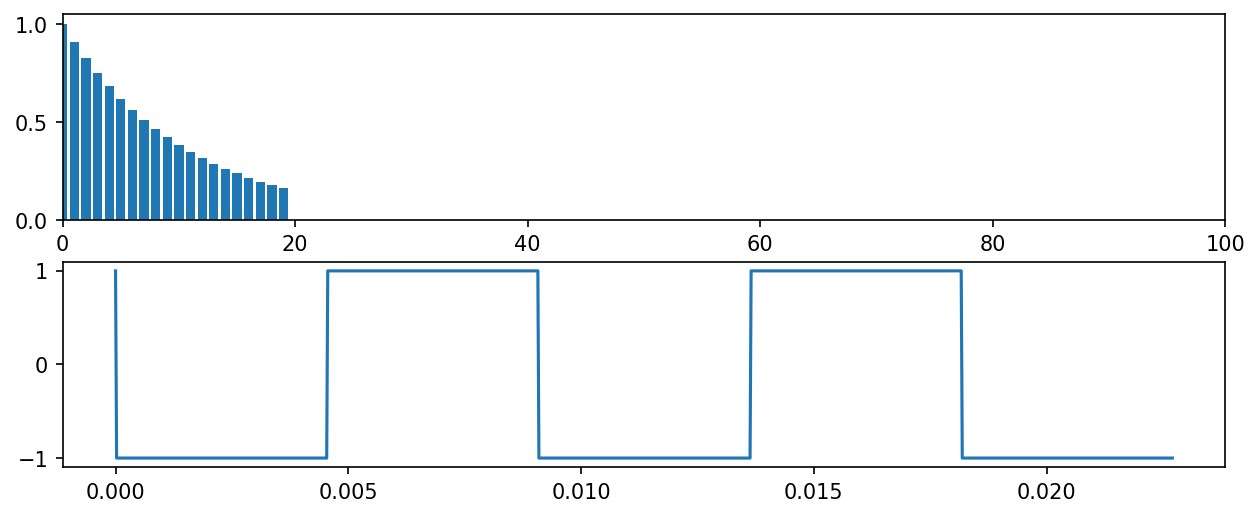

In [369]:
fig = plt.figure(figsize=(10, 4), dpi=150)
ax_coeffs = fig.add_subplot(211)
ax_wave = fig.add_subplot(212)
ax_coeffs.bar(range(len(alpha)), alpha)
# ax_coeffs.bar(range(len(alpha)), numpy.log(abs(alpha)))
ax_wave.plot(t_waveform, waveform)
# ax_wave.set_xlim(0, .01)
ax_coeffs.set_xlim(0, 100)
plt.show()

- most sounds with a fundamental frequency can be described as a series of harmonic overtones

In [1]:
###### scaled = numpy.int16(data / numpy.max(abs(data)) * (2**15 - 1))
# write('./audio/test.wav', 44100, scaled)